In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv("MaunaLoaDailyTemps.csv")

In [5]:
data.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,1/1/2014,33.0,46.0,40.0,657,1756
1,1/2/2014,35.0,50.0,43.0,657,1756
2,1/3/2014,36.0,45.0,41.0,657,1757
3,1/4/2014,32.0,41.0,37.0,658,1757
4,1/5/2014,24.0,38.0,31.0,658,1758


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     1825 non-null   object 
 1   MinTemp  1821 non-null   float64
 2   MaxTemp  1821 non-null   float64
 3   AvgTemp  1821 non-null   float64
 4   Sunrise  1825 non-null   int64  
 5   Sunset   1825 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 85.7+ KB


In [7]:
data.isnull().sum()

DATE       0
MinTemp    4
MaxTemp    4
AvgTemp    4
Sunrise    0
Sunset     0
dtype: int64

In [8]:
data["DATE"]=pd.to_datetime(data["DATE"])

In [9]:
data=data.ffill()

In [10]:
df=data.ffill()


In [11]:
df.isnull().sum()

DATE       0
MinTemp    0
MaxTemp    0
AvgTemp    0
Sunrise    0
Sunset     0
dtype: int64

In [12]:
df.index=df["DATE"]
df=df.drop(["DATE"],axis=1)
df.isnull().sum()

MinTemp    0
MaxTemp    0
AvgTemp    0
Sunrise    0
Sunset     0
dtype: int64

In [13]:
data_MinTemp=df.drop(["MaxTemp", "AvgTemp","Sunrise","Sunset"],axis=1 )
data_MaxTemp=df.drop(["MinTemp", "AvgTemp","Sunrise","Sunset"],axis=1 )
data_AvgTemp=df.drop(["MinTemp", "MaxTemp","Sunrise","Sunset"],axis=1 )
data_Sunset=df.drop(["MinTemp", "AvgTemp","Sunrise","MaxTemp"],axis=1 )
data_Sunrise=df.drop(["MinTemp", "AvgTemp","MaxTemp","Sunset"],axis=1 )

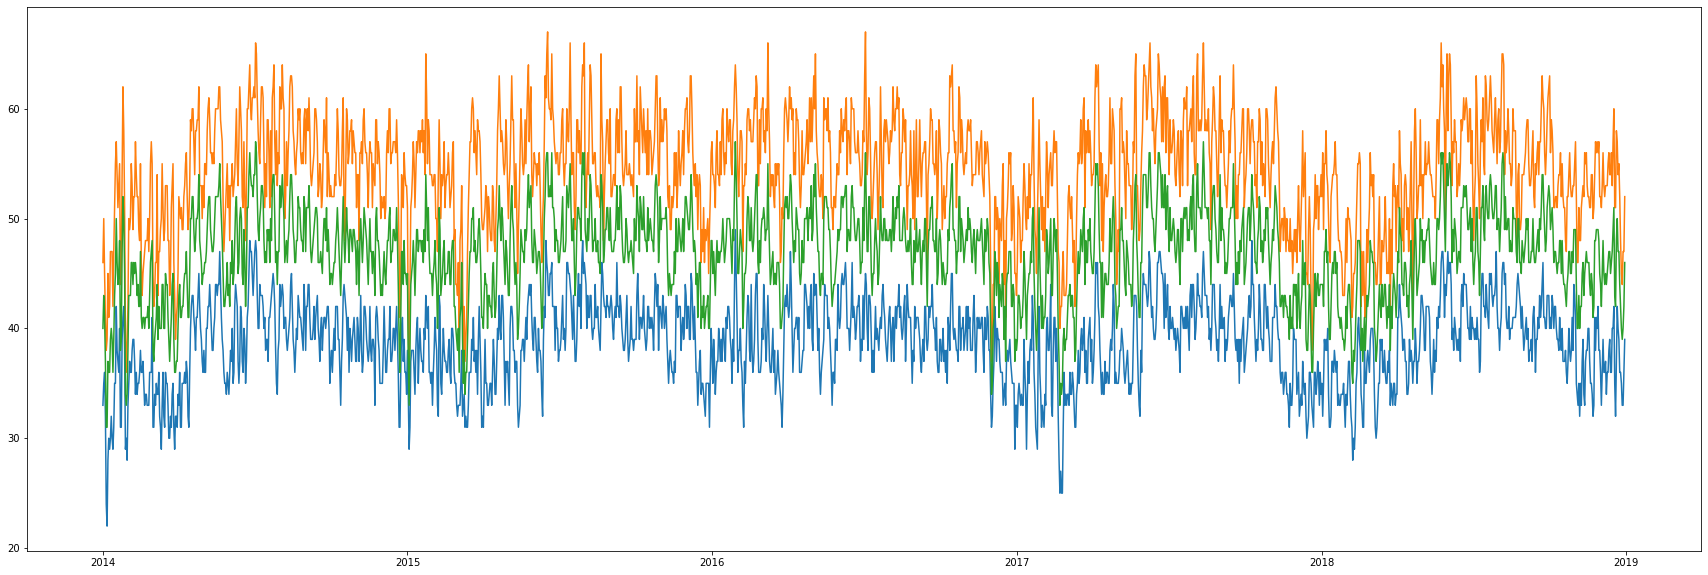

In [14]:
#Plotting Time Series Graph
plt.figure(figsize=(30,10))
print(plt.plot(data_MinTemp["MinTemp"],label="MinTemp"))
print(plt.plot(data_MaxTemp["MaxTemp"],label="MaxTemp"))
print(plt.plot(data_AvgTemp["AvgTemp"],label="AvgTemp"))


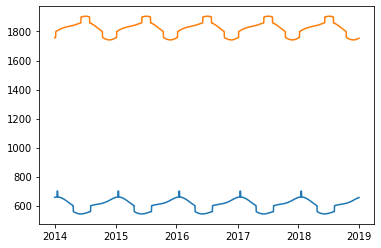

In [15]:

print(plt.plot(data_Sunrise["Sunrise"],label="Sunrise"))
print(plt.plot(data_Sunset["Sunset"],label="Sunset"))

In [16]:
data_MinTemp.isnull().sum()

MinTemp    0
dtype: int64

In [17]:
#Adfuller Test for Mintemp
from statsmodels.tsa.stattools import adfuller
result=adfuller(data_MinTemp["MinTemp"])
print('p-value of MinTemp: %f' % result[1])

result=adfuller(data_MaxTemp["MaxTemp"])
print('p-value of MaxTemp: %f' % result[1])

result=adfuller(data_AvgTemp["AvgTemp"])
print('p-value of AvgTemp: %f' % result[1])

result=adfuller(data_Sunrise["Sunrise"])
print('p-value of Sunrise: %f' % result[1])

result=adfuller(data_Sunset["Sunset"])
print('p-value of Sunset: %f' % result[1])

p-value of MinTemp: 0.000305
p-value of MaxTemp: 0.000000
p-value of AvgTemp: 0.000000
p-value of Sunrise: 0.019557
p-value of Sunset: 0.202239


In [18]:
#Interpretation from Adfuller Test
# 1.MaxTemp is Stationary
# 2.MinTemp is Stationary
# 3.AvgTemp is Stationary
# 4.Sunrise is Stationary
# 5.Sunset is Non Stationary

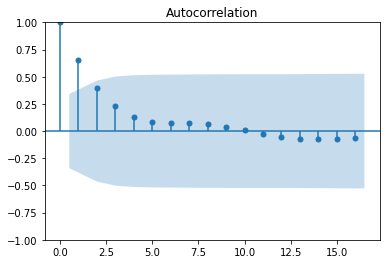

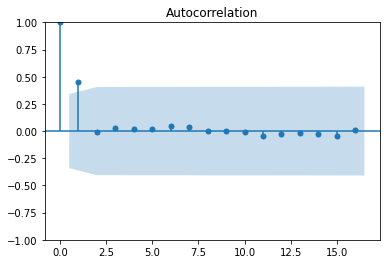

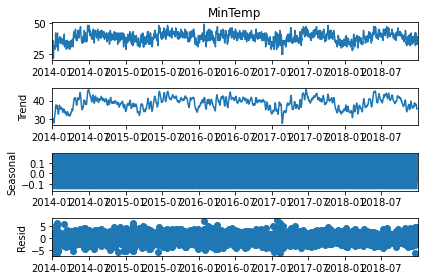

In [19]:
# Autocorrelation and Partial Autocorrelation for Min Temp
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
acf_plot=acf(data_MinTemp)
pacf_plot=pacf(data_MinTemp)
plot_acf(acf_plot);
plot_acf(pacf_plot);

from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result=seasonal_decompose(data_MinTemp["MinTemp"].dropna())
decompose_result.plot();

In [20]:
from pmdarima import auto_arima
order = auto_arima(data_MinTemp["MinTemp"], trace=True)
order.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8313.712, Time=5.69 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10051.919, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8332.627, Time=0.31 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=8974.392, Time=0.41 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=18536.548, Time=1.00 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8325.847, Time=2.94 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8336.420, Time=1.48 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8329.017, Time=4.80 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8299.928, Time=3.30 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8297.190, Time=2.96 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=8495.596, Time=0.77 sec
 ARIMA(1,0,4)(0,0,0)[0] intercept   : AIC=8274.158, Time=3.75 sec
 ARIMA(0,0,4)(0,0,0)[0] intercept   : AIC=8429.766, Time=1.03 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8300.832, Time=3.89 sec
 ARIMA(1,0,5)(0,0,0)[0] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1825
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4125.898
Date:                Fri, 11 Nov 2022   AIC                           8267.796
Time:                        15:05:13   BIC                           8311.871
Sample:                    01-01-2014   HQIC                          8284.055
                         - 12-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.8635      0.278      3.103      0.002       0.318       1.409
ar.L1          0.9775      0.007    134.280      0.000       0.963       0.992
ma.L1         -0.2223      0.024     -9.402      0.000      -0.269      -0.176
ma.L2         -0.2409      0.024     -9.895      0.000      -0.289      -0.193
ma.L3         -0.1474      0.025     -5.938      0.000      -0.196      -0.099
ma.L4         -0.1035      0.024     -4.391      0.000      -0.150      -0.057
ma.L5         -0.0690      0.024     -2.848      0.004      -0.117      -0.022
sigma2         5.3601      0.166     32.240      0.000       5.034       5.686
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                15.93
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.76   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [92]:
from statsmodels.tsa.arima.model import ARIMA
train=data_MinTemp.iloc[:1460]['MinTemp']
test1=data_MinTemp.iloc[1461:]["MinTemp"]

model = ARIMA(train, order=(1,0,5))
model_fit_Min=model.fit()
model_fit_Min.summary()

C:\Users\Bhavanasri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Bhavanasri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Bhavanasri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                MinTemp   No. Observations:                 1460
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -3325.999
Date:                Fri, 11 Nov 2022   AIC                           6667.997
Time:                        15:46:22   BIC                           6710.287
Sample:                    01-01-2014   HQIC                          6683.773
                         - 12-30-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.2336      0.802     47.654      0.000      36.661      39.806
ar.L1          0.9871      0.006    177.317      0.000       0.976       0.998
ma.L1         -0.2285      0.026     -8.962      0.000      -0.279      -0.179
ma.L2         -0.2825      0.027    -10.633      0.000      -0.335      -0.230
ma.L3         -0.1379      0.028     -4.883      0.000      -0.193      -0.083
ma.L4         -0.1118      0.026     -4.256      0.000      -0.163      -0.060
ma.L5         -0.0604      0.027     -2.244      0.025      -0.113      -0.008
sigma2         5.5697      0.193     28.878      0.000       5.192       5.948
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                13.27
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                             0.13
Prob(H) (two-sided):                  0.26   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot: xlabel='DATE'>

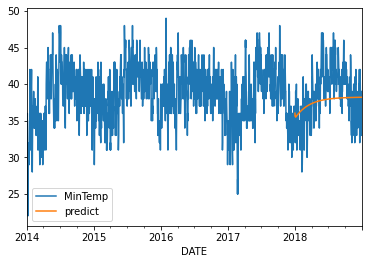

In [90]:
data_MinTemp['predict']= model_fit_Min.predict(start= len(train),end=len(train)+len(test)-1,dynamic=True)
data_MinTemp[['MinTemp','predict']].plot()


In [95]:
data_Min=data_MinTemp["predict"].dropna()

In [96]:
from sklearn.metrics import r2_score
r2=r2_score(test1,data_Min)
r2

0.07184040480627452

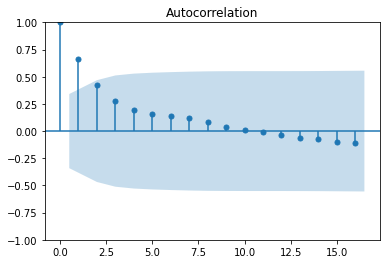

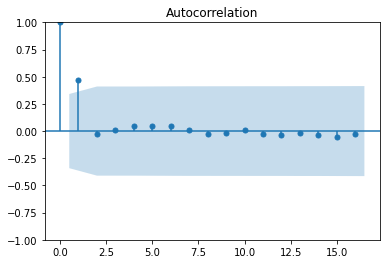

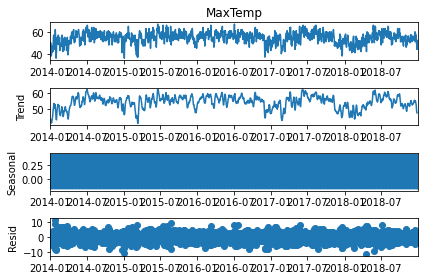

In [22]:
# Autocorrelation and Partial Autocorrelation for Max Temp
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
acf_plot=acf(data_MaxTemp)
pacf_plot=pacf(data_MaxTemp)
plot_acf(acf_plot);
plot_acf(pacf_plot);

from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result=seasonal_decompose(data_MaxTemp["MaxTemp"].dropna())
decompose_result.plot();

In [23]:
from pmdarima import auto_arima
order = auto_arima(data_MaxTemp["MaxTemp"], trace=True)
order.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=9530.253, Time=1.40 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=11064.476, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=9526.013, Time=0.30 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=10109.636, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19790.876, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=9527.774, Time=0.24 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=9527.761, Time=0.80 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=9529.763, Time=0.83 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 4.140 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1825
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -4760.006
Date:                Fri, 11 Nov 2022   AIC                           9526.013
Time:                        15:05:21   BIC                           9542.541
Sample:                    01-01-2014   HQIC                          9532.110
                         - 12-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.3809      0.795     16.829      0.000      11.823      14.939
ar.L1          0.7545      0.015     51.513      0.000       0.726       0.783
sigma2        10.7850      0.311     34.652      0.000      10.175      11.395
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                65.69
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                            -0.29
Prob(H) (two-sided):                  0.19   Kurtosis:                         3.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [99]:
from statsmodels.tsa.arima.model import ARIMA
train=data_MaxTemp.iloc[:1460]['MaxTemp']
test2=data_MaxTemp.iloc[1461:]["MaxTemp"]

model = ARIMA(train, order=(1,0,0))
model_fit_Max=model.fit()
model_fit_Max.summary()

C:\Users\Bhavanasri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Bhavanasri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Bhavanasri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                MaxTemp   No. Observations:                 1460
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3816.077
Date:                Fri, 11 Nov 2022   AIC                           7638.155
Time:                        15:49:11   BIC                           7654.014
Sample:                    01-01-2014   HQIC                          7644.071
                         - 12-30-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.7249      0.353    155.106      0.000      54.033      55.416
ar.L1          0.7509      0.016     46.416      0.000       0.719       0.783
sigma2        10.9031      0.350     31.169      0.000      10.217      11.589
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                57.63
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                            -0.31
Prob(H) (two-sided):                  0.74   Kurtosis:                         3.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot: xlabel='DATE'>

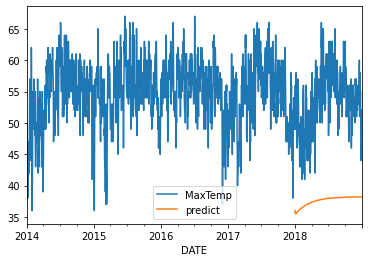

In [97]:
data_MaxTemp['predict']= model_fit_Min.predict(start= len(train),end=len(train)+len(test)-1,dynamic=True)
data_MaxTemp[['MaxTemp','predict']].plot()

In [98]:
data_Max=data_MaxTemp["predict"].dropna()

In [104]:
from sklearn.metrics import r2_score
r2=r2_score(test2,data_Max)
r2

-10.260519114181392

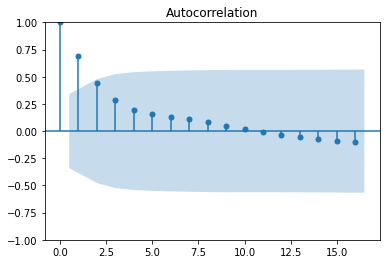

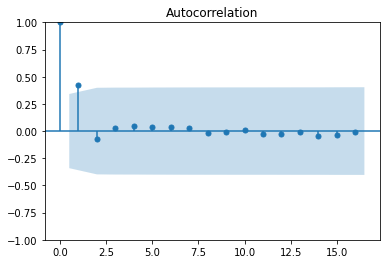

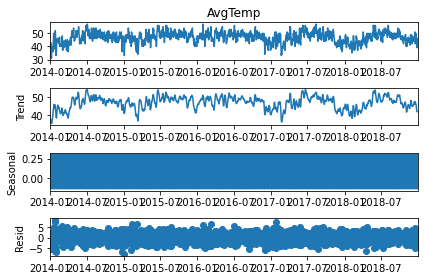

In [25]:
# Autocorrelation and Partial Autocorrelation for Avg Temp
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
acf_plot=acf(data_AvgTemp)
pacf_plot=pacf(data_AvgTemp)
plot_acf(acf_plot);
plot_acf(pacf_plot);

from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result=seasonal_decompose(data_AvgTemp["AvgTemp"].dropna())
decompose_result.plot();

In [26]:
from pmdarima import auto_arima
order = auto_arima(data_AvgTemp["AvgTemp"], trace=True)
order.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8360.310, Time=2.86 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10369.006, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8380.315, Time=0.25 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9152.451, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19234.227, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8370.143, Time=1.32 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8370.609, Time=2.46 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8361.519, Time=3.20 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8335.392, Time=3.36 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8344.960, Time=2.79 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8323.341, Time=4.71 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8345.866, Time=4.99 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8333.221, Time=4.30 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8322.795, Time=3.89 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1825
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4146.789
Date:                Fri, 11 Nov 2022   AIC                           8309.578
Time:                        15:06:13   BIC                           8353.653
Sample:                    01-01-2014   HQIC                          8325.836
                         - 12-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2354      0.373      3.314      0.001       0.505       1.966
ar.L1          0.9734      0.008    121.169      0.000       0.958       0.989
ma.L1         -0.1174      0.024     -4.909      0.000      -0.164      -0.071
ma.L2         -0.2204      0.024     -9.098      0.000      -0.268      -0.173
ma.L3         -0.2054      0.024     -8.549      0.000      -0.253      -0.158
ma.L4         -0.1385      0.023     -6.054      0.000      -0.183      -0.094
ma.L5         -0.0487      0.025     -1.987      0.047      -0.097      -0.001
sigma2         5.5261      0.174     31.800      0.000       5.185       5.867
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                20.90
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [72]:
from statsmodels.tsa.arima.model import ARIMA
train=data_AvgTemp.iloc[:1460]['AvgTemp']
test3=data_AvgTemp.iloc[1461:]["AvgTemp"]

model = ARIMA(train, order=(1,0,5))
model_fit_Avg=model.fit()
model_fit_Avg.summary()

C:\Users\Bhavanasri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Bhavanasri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Bhavanasri\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1460
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -3342.007
Date:                Fri, 11 Nov 2022   AIC                           6700.014
Time:                        15:37:40   BIC                           6742.303
Sample:                    01-01-2014   HQIC                          6715.789
                         - 12-30-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5459      0.794     58.642      0.000      44.990      48.102
ar.L1          0.9842      0.006    155.552      0.000       0.972       0.997
ma.L1         -0.1295      0.025     -5.085      0.000      -0.179      -0.080
ma.L2         -0.2455      0.026     -9.302      0.000      -0.297      -0.194
ma.L3         -0.2033      0.026     -7.813      0.000      -0.254      -0.152
ma.L4         -0.1481      0.025     -5.857      0.000      -0.198      -0.099
ma.L5         -0.0595      0.027     -2.202      0.028      -0.112      -0.007
sigma2         5.6924      0.198     28.678      0.000       5.303       6.081
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.43
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                            -0.16
Prob(H) (two-sided):                  0.60   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
 len(train)

1460

In [62]:
len(test)

364

In [64]:
end=len(train)+len(test)+1
end

1825

<AxesSubplot: xlabel='DATE'>

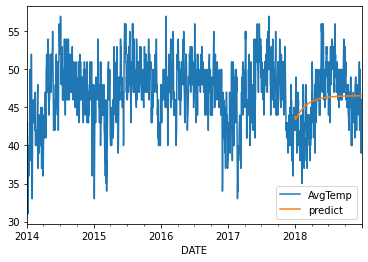

In [74]:
data_AvgTemp['predict']= model_fit_Avg.predict(start= len(train),end=len(train)+len(test)-1,dynamic=True)
data_AvgTemp[['AvgTemp','predict']].plot()


In [75]:
data_AvgTemp["predict"].shape

(1825,)

In [76]:
data_Avg=data_AvgTemp["predict"].dropna()
data_Avg.shape

(364,)

In [86]:
from sklearn.metrics import r2_score
r2=r2_score(test3,data_Avg)
r2

0.13151011017126835

In [29]:
# 1. How many Days Average temperature exceeds 50 celsius?
# b. 331


Average_Temp_Gr50=data[data["AvgTemp"]>50]
Average_Temp_Gr50.shape

(332, 6)

In [30]:
# 2. Which year will be termed as the hottest year?
# c. 2016

data["MaxTemp"].max()
data2=data[data["MaxTemp"]==67]
data2

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
533,2015-06-18,45.0,67.0,56.0,544,1903
914,2016-07-03,45.0,67.0,56.0,548,1905


In [31]:
# 3. How you will be handling missing values in this dataset:
# c. Fill up the null values with the mean.


In [32]:
# 4. Which columns are not having any kind of relationship with the MaxTemp
# column?
# a. Sunset
# c. Sunrise

print(np.corrcoef(data["MaxTemp"], data["MinTemp"]))
print(np.corrcoef(data["MaxTemp"], data["AvgTemp"]))
print(np.corrcoef(data["MaxTemp"], data["Sunrise"]))
print(np.corrcoef(data["MaxTemp"], data["Sunset"]))

[[1.         0.75632229]
 [0.75632229 1.        ]]
[[1.         0.95108103]
 [0.95108103 1.        ]]
[[ 1.         -0.37544209]
 [-0.37544209  1.        ]]
[[1.         0.27628272]
 [0.27628272 1.        ]]


In [33]:
# 5. Which of the following Order is the best order for ARIMA Model on top of the
# Above Dataset.
# a. ARIMA(1,0,5)


In [34]:
# 6. What is the ADF(Augmented Dickey Fuller Test) used for detecting?
# c. Stationary

In [35]:
# 7. Which of the Statements is True ?
# b. p<0.05 Data is stationary

In [105]:
# 8. Determine the Average Error in Prediction By the Model?
# c. 6-8%

In [106]:
# 9. What is the Coefficient of AR of the above model ?
# a. 0.90 to 1.0

In [107]:
# 10.Which conditions need to be satisfied to refer to the time series as stationary.
# c. Mean is constant and does not depend on time

In [108]:
# 11. IF we have observed the time series Y1, Y2, ..., Yt and the forecast error et(l)
# = Yt+l − bYt(l) has mean zero, the MMSE forecast bYt(l) can be referred as:
# a.unbiased

In [109]:
# 12.Which of the following is a seasonality Detection Technique for Time Series
# Data?
# d. Both 1 and 2

In [110]:
# 13. If the moving average component (q) in an ARIMA model = 1, Hence there
# will be the auto-correlation in the series with lag =1.
# a. True

In [111]:
# 14.What is the expectation of the dependent variable for a Moving Average
# Model?
# b. Constant

In [112]:
# 15. Which of the following statements is True?
# 1.If there is no decay in the ACF values for any number of lags time series is
# Stationary
# 2.The rate of decay will determine the value of the coefficient terms.
# 3.In a Time Series coefficient for the residual error terms can be negative

# d. All of the Above